# Exploratory Data Analysis (EDA)

El índice S&P 500, (Standard & Poor’s 500), es un índice que indica el rendimiento de las 500 mayores empresas que cotizan en Estados Unidos (por capitalización de mercado). Es un indicador clave de la salud económica de la bolsa estadounidense ya que abarca distintos tipos de industrias, como tecnología, atención médica, servicios financieros, bienes de consumo y energía, seleccionadas por su tamaño, liquidez y representatividad económica. 

El objetivo principal de este proyecto es analizar las tendencias y patrones históricos de precios y volúmenes de las acciones de las empresas del S&P 500 para proporcionar insights accionables.


En este EDA se realizara un analis general del dataset para entender los datos con los que se estara trabajando. Para esto se realizara lo siguiente:
- Descripcion de variables
- Visualizacion inicial 
- Estadisticas descriptivas
- Identificcion de outliers o valores faltantes

## Analisis del dataset

Los datos que se utilizaran provienen de Kaggle y contiene precios históricos de acciones para todas las empresas que actualmente se encuentran en el índice S&P 500. 

- Enlace: [S&P 500 Stocks (daily updated)](https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?select=sp500_companies.csv)

El dataset contienen 3 archivos, sobre los cuales se realizara un analisis de su estructura. 


### Cargar datos

In [11]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
# Load the dataset
df_raw_companies = pd.read_csv('../data/raw/sp500_companies.csv')
df_raw_index = pd.read_csv('../data/raw/sp500_index.csv')
df_raw_stocks = pd.read_csv('../data/raw/sp500_stocks.csv')


### Analisis de los datos df_raw_companies

#### Variables

In [27]:
# Exploracion de datos
df_raw_companies.info()
df_raw_companies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             502 non-null    object 
 1   Symbol               502 non-null    object 
 2   Shortname            502 non-null    object 
 3   Longname             502 non-null    object 
 4   Sector               502 non-null    object 
 5   Industry             502 non-null    object 
 6   Currentprice         502 non-null    float64
 7   Marketcap            502 non-null    int64  
 8   Ebitda               473 non-null    float64
 9   Revenuegrowth        499 non-null    float64
 10  City                 502 non-null    object 
 11  State                482 non-null    object 
 12  Country              502 non-null    object 
 13  Fulltimeemployees    493 non-null    float64
 14  Longbusinesssummary  502 non-null    object 
 15  Weight               502 non-null    flo

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


Segun lo observado, tenemos algunas variables clave para el analisis financiero: 

1. Currentprice: Es crucial para evaluar el valor actual de las acciones y realizar análisis de precios históricos o comparativos.
2. Marketcap: Indica el tamaño de la empresa en términos de valor de mercado, esencial para clasificar empresas por capitalización (grande, mediana, pequeña).
3. Ebitda: Mide la rentabilidad operativa de la empresa, útil para comparar empresas dentro de un sector.
4. Revenuegrowth: Refleja el crecimiento de ingresos, importante para evaluar el desempeño y potencial de crecimiento.
5. Weight: Representa la influencia de la empresa en el índice S&P 500, clave para análisis de impacto en el índice.

Igualmente tenemos variables desciptivas que nos ayudaran a realizar un analisis sectorial y contextual:

6. Sector: Permite agrupar empresas por sectores económicos, útil para análisis sectoriales.
7. Industry: Proporciona un nivel más detallado dentro del sector, ideal para análisis específicos de industrias.
8. Exchange: Indica dónde se negocian las acciones, relevante para análisis de mercados específicos.
9. Symbol: Identificador único de la acción, necesario para vincular datos externos o realizar consultas específicas.
10. Shortname y Longname: Ayudan a identificar y presentar las empresas de forma clara.
11. City, State, Country: Útiles para análisis geográficos o de distribución regional.
12. Fulltimeemployees: Indica el tamaño de la fuerza laboral, relevante para evaluar la escala operativa.
13. Longbusinesssummary: Proporciona contexto sobre la empresa, útil para análisis cualitativos.



#### Tipos de datos

Para realizar mas adelante el procesamiento de datos debemos tener en cuenta los siguiente: 

- Tenemos 16 campos de los cuales la mayoria (11) con descriptivos, los cuales seran analizados como Object(string)
- Tenemos 6 campos numericos de los cuales 4 son float y 2 se los puede tratar como enteros (Fulltimeemployees, Marketcap)

#### Estadisticas descriptivas

      Currentprice             Marketcap              Ebitda Revenuegrowth  \
count       502.00                502.00              473.00        499.00   
mean        217.89    110,722,171,760.19    7,045,285,743.51          0.07   
std         489.21    344,007,401,496.97   16,242,128,052.50          0.18   
min           9.40      4,664,099,328.00   -3,991,000,064.00         -0.60   
25%          68.55     19,334,173,696.00    1,624,999,936.00          0.00   
50%         118.37     37,063,958,528.00    2,952,748,032.00          0.05   
75%         227.67     78,305,652,736.00    6,019,999,744.00          0.11   
max       8,276.78  3,846,819,807,232.00  149,547,008,000.00          1.63   

      Fulltimeemployees  Weight  
count            493.00  502.00  
mean          57,827.61    0.00  
std          139,598.81    0.01  
min               28.00    0.00  
25%           10,200.00    0.00  
50%           21,690.00    0.00  
75%           55,100.00    0.00  
max        2,100,000.00  

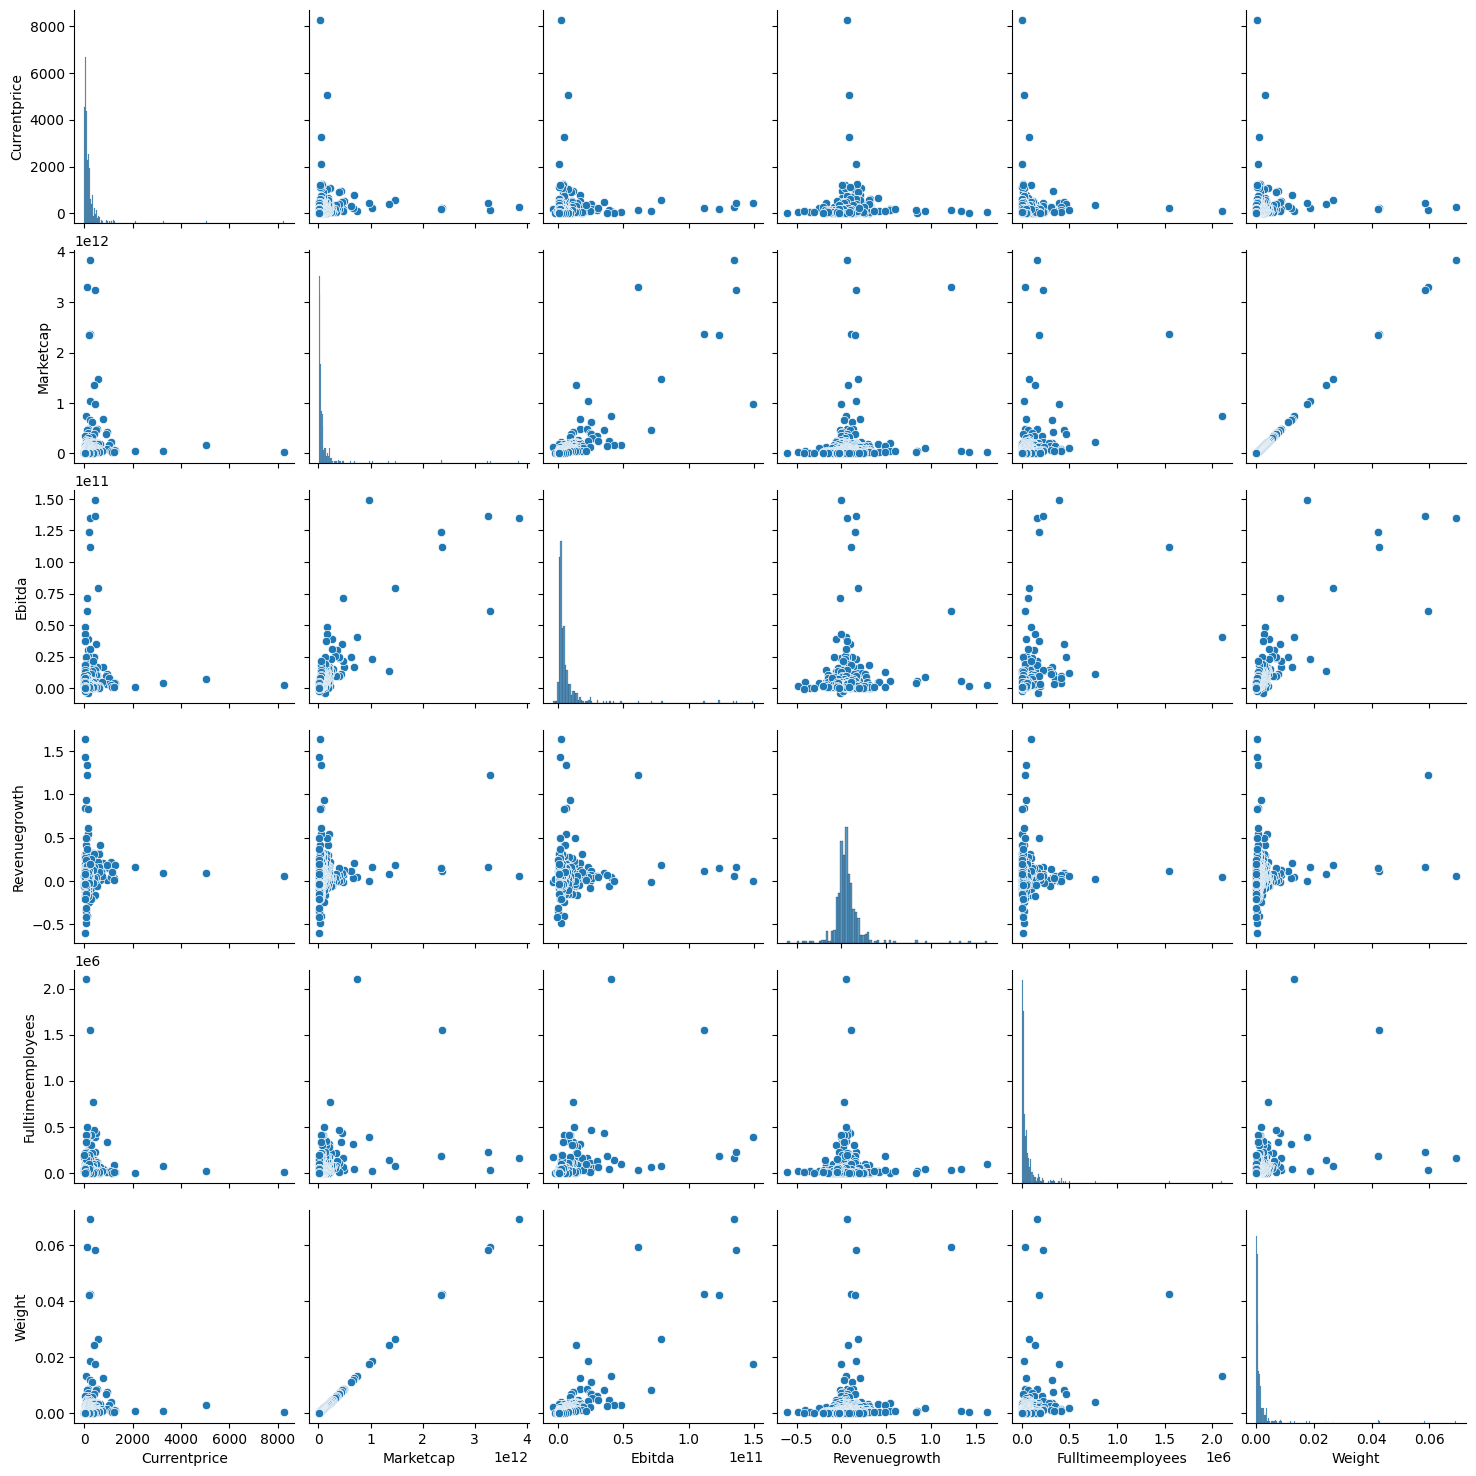

In [24]:
# Datos estadísticos columnas numericas 
estadisticas = df_raw_companies.describe()

formatted_stats = estadisticas.map(lambda x: f'{x:,.2f}')
print(formatted_stats)


sns.pairplot(df_raw_companies)

Segun las estadisticas podemos ver lo siguiente en cada variable: 

- **Currentprice:** La media ($217.89) es mucho menor que la desviación estándar ($489.21), lo que indica una distribución sesgada hacia valores altos. Pueden haber valores atipicos altos.
- **Marketcap:** La media ($110.72 mil millones) también es menor que la desviación estándar ($344.01 mil millones), lo que sugiere una distribución sesgada por empresas de gran capitalización.
- **Ebitda:** La mediana ($2.95 mil millones) es mucho menor que la media ($7.04 mil millones), lo que confirma la influencia de outliers altos.
- **Revenuegrowth:** La mayoría de las empresas tienen un crecimiento de ingresos cercano a 0 (mediana = 0.05), pero los valores extremos afectan la media (0.07). La desviacion estandar es de 0.18 y el maximo malor es de 1.63 lo que indica posibles valores atipicos negativos y positivos.
- **Fulltimeemployees:** La media (57,827) es significativamente mayor que la mediana (21,690), lo que indica la presencia de empresas con un número desproporcionadamente alto de empleados.

Tambien podemos observar relaciones entre las variables numericas.

- Entre marketcap y weight hay una relacion directamente proporcional, ya que el peso  de una empresa en el índice S&P 500 se calcula en función de su capitalización de mercado (Marketcap). 
- Entre marketcap y fulltimeemployees puede haber una relacion ya que las empresas mas grandes tiendes a tener mayor numero de empleados y por ende una posible mayor capitalizacion en el mercado. Sin embargo, hay que analizar que tipo de relacion es, ya que algunas empresas tecnológicas tienen alta capitalización con pocos empleados.
- Aunque no se observa directamente en los datos, es probable que exista una relación positiva entre el EBITDA y el crecimiento de ingresos, ya que un mayor crecimiento de ingresos puede traducirse en mayores ganancias operativas.

#### Identificacion de outliers y valores atipicos 

El archivo contiene 502 instancias. Podemos observar que en los siguientes campos existen valores nulos.

8   Ebitda               473 non-null    
9   Revenuegrowth        499 non-null    
11  State                482 non-null     
13  Fulltimeemployees    493 non-null   

Los valores nulos en estos features podrian impactar el analisis a la hora de calcular metricas con funciones agregadas, realizar comparaciones entre empresas o analisis sectoriales. Sin embargo vemos que en relacion al total de instancias el porcentaje es bajo por lo que podriamos imputar valores para cada caso sin afectar el analisis posterior.

- Ebitda: imputar valores con la mediana
- Revenuegrowth: imputar valores basados en el crecimiento promedio de la industria
- State: se puede tratar como una categoria separada "Desconocido"
- Fulltimeemployees: imputar valores con la media del sector


Los outliers pueden distorsionar las métricas agregadas como la media y la desviación estándar, afectando el análisis general. Lo que se pudo observar mediante los graficos y estadisticas obtenidas fue lo siguiente:

Las 5 variables (marketcap, ebitda, revenuegrowth, fulltimeemployees y currentprice) tienen desviaciones estandar altos por lo que probablente se tenga outliers altos.






### Analisis de los datos df_raw_index

#### Variables

In [35]:
# Exploracion de datos
df_raw_index.info()
df_raw_index.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   S&P500  2517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB


,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57


En este archivo tenemos 2 variables numericas: la fecha y el indice S&P. Estas variables permiten analizar tendencias en el tiempo del índice S&P 500 relacionadas con el mercado bursátil.

#### Tipos de datos

Para realizar mas adelante el procesamiento de datos debemos tener en cuenta los siguiente: 

- El campo fecha se debe convertir a datetime y se pueden sacar variables derivadas de este campo para posibles analisis. 
- El indice es un campo de tipo float.

#### Estadisticas descriptivas

In [42]:
# Datos estadísticos columnas numericas 
estadisticas = df_raw_index.describe()

formatted_stats = estadisticas.map(lambda x: f'{x:,.2f}')
print(formatted_stats['S&P500'])


count    2,517.00
mean     3,346.35
min      1,829.08
25%      2,428.37
50%      2,999.91
75%      4,199.12
max      6,090.27
std      1,078.20
Name: S&P500, dtype: object


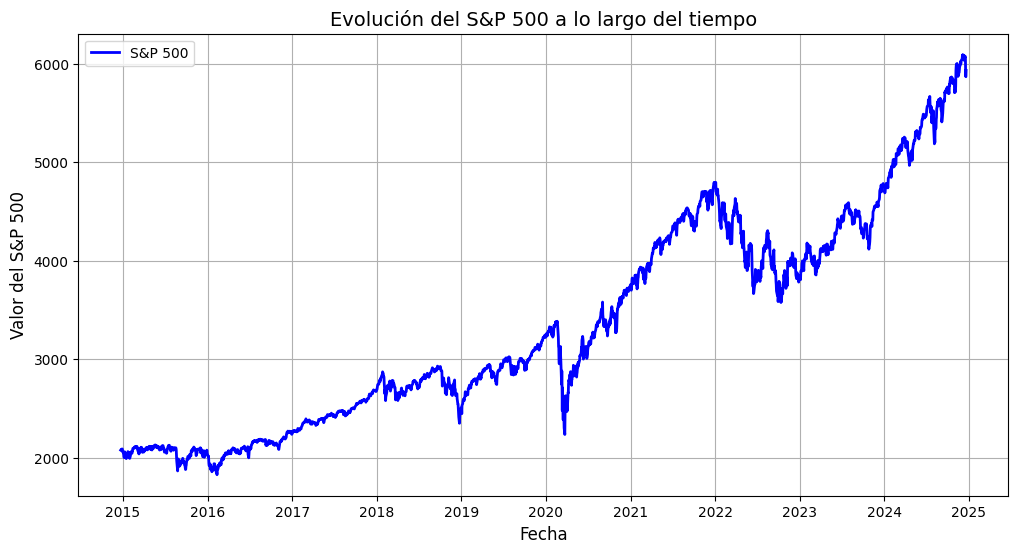

In [37]:
# Datos estadísticos columnas numericas 
df_raw_index['Date'] = pd.to_datetime(df_raw_index['Date'])

# Evolucion del S&P
plt.figure(figsize=(12, 6))
plt.plot(df_raw_index['Date'], df_raw_index['S&P500'], label='S&P 500', color='blue', linewidth=2)
plt.title('Evolución del S&P 500 a lo largo del tiempo', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor del S&P 500', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


Se puede observar un crecimiento sostenido del indice desde el 2015 hasta el 2025. Sin embargo tambien se pueden observar periodos fluctuantes (2022, 2023) y otro donde el indice se desploma (2020). Estos cambios se pueden haber dado por ejemplo por afectaciones en el mercado como el COVID (2020) o incertidumbres economicas o eventos globales (2022 y 2023), los cuales habria que investigar. Tambien se ve que en el 2025 alcanza su punto mas alto.

#### Identificacion de outliers y valores atipicos

El archivo contiene 2517 instancias de las cuales no existen valores nulos. 
Por otro lado, segun las estadistics descriptivas no se identifican valores atipicos extremos.

### Analisis de los datos df_raw_stocks

#### Variables

In [48]:
# Exploracion de datos
df_raw_stocks.info(show_counts=True)
df_raw_stocks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891536 entries, 0 to 1891535
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date       1891536 non-null  object 
 1   Symbol     1891536 non-null  object 
 2   Adj Close  617831 non-null   float64
 3   Close      617831 non-null   float64
 4   High       617831 non-null   float64
 5   Low        617831 non-null   float64
 6   Open       617831 non-null   float64
 7   Volume     617831 non-null   float64
dtypes: float64(6), object(2)
memory usage: 115.5+ MB


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,MMM,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,MMM,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,MMM,NaN,NaN,NaN,NaN,NaN,NaN


Este archivo es el que se tomara principalemnete en cuanta para realizar el analisis. En el mismo encontramos los siguientes features ((7) numéricos y uno de tipo objeto(string)):

1. **Date:** con este dato podemos realizar analisis temporales,  historicos o realizar comparaciones entre diferentes peridodos.
2. **Symbol:** identificador unico de la empresa. 
3. Adj Close: con este valor se podra realizar analisis historicos de las acciones. Util para realizar un analisis financiero.
4. **Close:** util para el analisis financiero, ya que refleja el precio final de la accion. Se lo puede comparar con el precio inicial para ver variaciones en el mercado.
5. **High:** util para el analisis financiero, indica el punto mas alto de la accion. Se puede usar para medir cambios, volatilidad y evaluar riesgos.
6. **Low:** util para el analisis financiero, indica el punto mas bajo de la accion. Se puede usar para medir cambios, volatilidad y evaluar riesgos.
7. **Open:** util para el analisis financiero ya que refleja el precio inicial. Se lo puede comparar con el precio de cierre para ver variaciones en el mercado.
8. **Volume:** indica la cantidad de acciones negociadas; util para confirmar tendencias dentro de diferentes periodos


#### Tipos de datos

Para realizar mas adelante el procesamiento de datos debemos tener en cuenta los siguiente: 

- Tenemos 1 campo de fecha el cual se puede convertir en datetime.
- El volumen se puede tratar como tipo entero ya que es la cantidad todal de acciones.
- El resto de features son numericos y corresponden a los precios de las acciones, por lo que se los puede tratar como tipo float.

#### Estadisticas descriptivas

        Adj Close       Close        High         Low        Open  \
count  617,831.00  617,831.00  617,831.00  617,831.00  617,831.00   
mean        79.67       87.47       88.42       86.48       87.46   
std        102.74      104.52      105.68      103.30      104.52   
min          0.20        0.22        0.23        0.22        0.22   
25%         26.57       32.70       33.06       32.30       32.69   
50%         49.82       59.14       59.72       58.50       59.12   
75%         94.83      105.02      106.13      103.89      105.00   
max      1,702.53    1,702.53    1,714.75    1,696.90    1,706.40   

                 Volume  
count        617,831.00  
mean       9,347,124.55  
std       47,716,693.57  
min                0.00  
25%        1,144,000.00  
50%        2,453,400.00  
75%        5,657,850.00  
max    3,692,928,000.00  


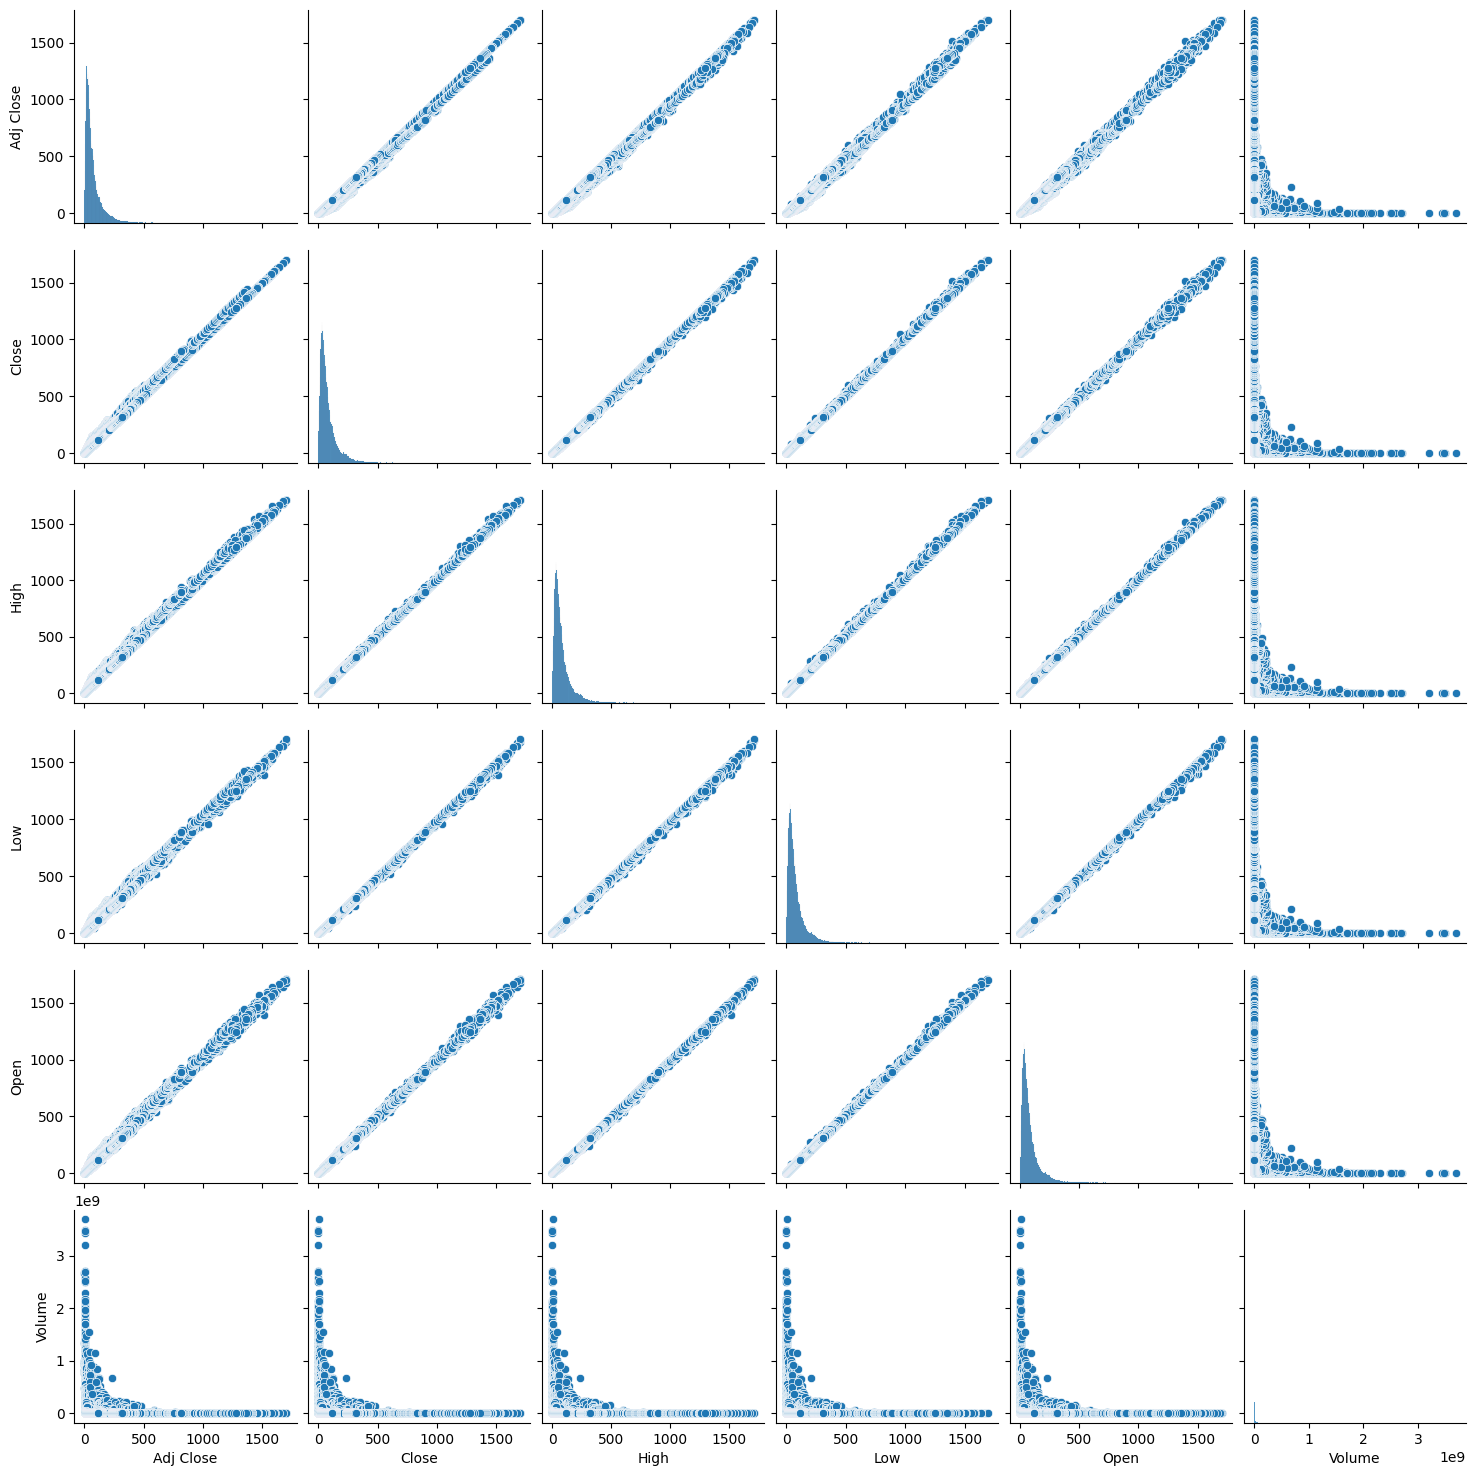

In [43]:
# Datos estadísticos columnas numericas 
estadisticas = df_raw_stocks.describe()

formatted_stats = estadisticas.map(lambda x: f'{x:,.2f}')
print(formatted_stats)


sns.pairplot(df_raw_stocks)

Segun las estadisticas podemos ver lo siguiente en cada variable: 

- **Adj close:** El valor máximo (1,702.53) es significativamente mayor que el percentil 75 (94.83), lo que indica outliers positivos.
- **Close:** el valor máximo (1,702.53) es un outlier positivo es significativamente mayor que el percentil 75 (105.02).
- **High:** El valor máximo (1,714.75) es un outlier positivo en comparación con el percentil 75 (106.13).
- **Low:** El valor máximo (1,696.90) es un outlier positivo. Este valor es mucho mayor que la media y esta lejos del percentil 75.
- **Open:** La media es mucho significativamente mas baja que el maximo, desviacion estandar y que el percentil 75.


Todas las variables al estar altamente coorrelacionadas tienen un comportamiento parecido y por ende tienen una dispersion grande, lo cual indica que hay valores atipicos bastante altos.


Tambien podemos observar la relacion entre variables. 

Las variables open, adj close, close, high, y low tienen una alta coorelacion ya que son indicadores de los precios de las acciones. 
El volumen, no parece tener una relacion con las variables de los precios; esto se puede dar ya que depende de la actividad del mercado mas que de los precios.

#### Identificacion de outliers y valores atipicos

El archivo contiene 1891536  instancias. Podemos observar que en los siguientes campos existen valores nulos.

2   Adj Close  617831 non-null                    
3   Close      617831 non-null                    
4   High       617831 non-null                    
5   Low        617831 non-null                    
6   Open       617831 non-null                    
7   Volume     617831 non-null                    

El porcentaje de valores nulos exitentes en estas columnas es bastante grande (67,36%) por lo que podrian impactar el analisis a la hora de calcular metricas. Se podrian tratar por ejemplo, mediante transformaciones o análisis separado.
Por ejemplo: para la variable **adj close** se podrian reemplazar los valores nulos con el precio de cirre ya que estan estrechamente coorelacionados, para **close**, **open**, **high**, **low**, se podrian reemplazar con la media de dias cercanos


Por otro lado, Las variables que indican precios (open, adj close, close, high) tienen outliers positivos. Esto puede ocurrir por empresas con precios muy altos en las acciones. 